In [3]:
pip install tensorflow

     |████████████████████████████████| 454.3 MB 12 kB/s s eta 0:00:01
     |████████████████████████████████| 1.2 MB 50.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 42.0 MB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 69.1 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 86.3 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 8.5 MB/s  eta 0:00:01
     |████████████████████████████████| 65 kB 6.9 MB/s  eta 0:00:01
     |████████████████████████████████| 129 kB 68.8 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 60.5 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 70.8 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 2.0 MB/s  eta 0:00:01
     |████████████████████████████████| 146 kB 79.2 MB/s eta 0:00:01
     |████████████████████████████████| 288 kB 54.5 MB/s eta 0:00:01
     |████████████████████████████████| 4.9 MB 74.1 MB/s eta 0:00:01
     |█████████████████████████████

Input dataset; [[37 39]
 [30 15]
 [88 10]
 ...
 [21 27]
 [30 55]
 [34 91]]
Outputs;  [1443  450  880 ...  567 1650 3094]
Epoch 1/30
900/900 - 3s - loss: 59.9305 - val_loss: 39.1425
Epoch 2/30
900/900 - 2s - loss: 35.4837 - val_loss: 32.7535
Epoch 3/30
900/900 - 3s - loss: 29.4915 - val_loss: 25.2416
Epoch 4/30
900/900 - 3s - loss: 19.9378 - val_loss: 15.1019
Epoch 5/30
900/900 - 2s - loss: 11.5402 - val_loss: 8.3671
Epoch 6/30
900/900 - 2s - loss: 6.5840 - val_loss: 5.1059
Epoch 7/30
900/900 - 3s - loss: 4.1290 - val_loss: 3.2666
Epoch 8/30
900/900 - 3s - loss: 2.9681 - val_loss: 2.5623
Epoch 9/30
900/900 - 3s - loss: 2.3248 - val_loss: 1.9890
Epoch 10/30
900/900 - 3s - loss: 1.9552 - val_loss: 1.7750
Epoch 11/30
900/900 - 3s - loss: 1.7272 - val_loss: 1.7673
Epoch 12/30
900/900 - 3s - loss: 1.5604 - val_loss: 1.3875
Epoch 13/30
900/900 - 2s - loss: 1.4311 - val_loss: 1.3444
Epoch 14/30
900/900 - 3s - loss: 1.2993 - val_loss: 1.1823
Epoch 15/30
900/900 - 2s - loss: 1.2479 - val_loss: 1

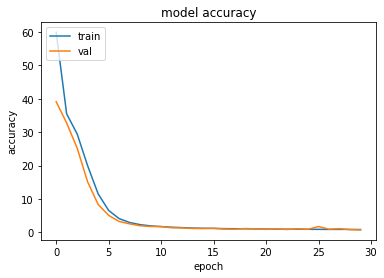

In [38]:
import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
from keras import Input, Model
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt

trainingInput = np.array([[random.randrange(1, 100) ,  random.randrange(1,100)] for i in range(1, 100*100*10)])
trainingOutput =  np.array([(input [0] * input [1]) for input  in trainingInput ])

print("Input dataset;", trainingInput)
print("Outputs; ", trainingOutput)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(2,)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(1)
])

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mape')

history = model.fit(trainingInput, trainingOutput, batch_size=100, validation_split=0.1, epochs=30, verbose=2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [41]:
a = np.array([[10, 2], [3.5,4], [21, 0.5], [1.5, 48.6], [30, 20], [-10, 10]])
print(model.predict(a))

[[  19.95052 ]
 [  13.915656]
 [   9.430047]
 [  73.36166 ]
 [ 598.8429  ]
 [-112.15888 ]]


[[3.95124372 3.4339872 ]
 [4.17438727 3.55534806]
 [0.69314718 4.2341065 ]
 ...
 [4.12713439 4.30406509]
 [4.44265126 4.54329478]
 [4.54329478 3.63758616]]
[7.38523092 7.72973533 4.92725369 ... 8.43119948 8.98594604 8.18088094]
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_24 (Flatten)         (None, 2)                 0         
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 3         
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
450/450 - 1s - loss: 1.7943 - val_loss: 0.2700
Epoch 2/5
450/450 - 1s - loss: 0.1112 - val_loss: 0.0309
Epoch 3/5
450/450 - 1s - loss: 0.0276 - va

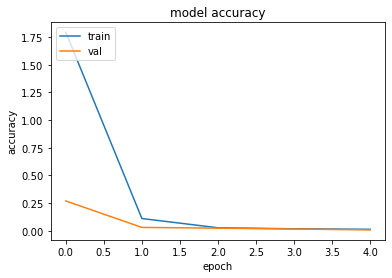

In [47]:
# Log version

import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
from keras import Input, Model
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
import math

trainingInput = np.array([[math.log(random.randrange(1, 100)) ,  math.log(random.randrange(1,100))] for i in range(1, 100*100*5)])
trainingOutput =  np.array([(input [0] + input [1]) for input  in trainingInput ])

print(trainingInput)
print(trainingOutput)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(2,)),
    tf.keras.layers.Dense(1, activation="linear"), # does only addition, so 1 neuron is sufficient
    keras.layers.Dense(1)
])

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='mae')

print(model.summary())
history = model.fit(trainingInput, trainingOutput, batch_size=100, validation_split=0.1, epochs=5, verbose=2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [49]:
a = np.array([[math.log(21), math.log(0.5)]])
print(math.exp(model.predict(a)))

10.48474877176485
